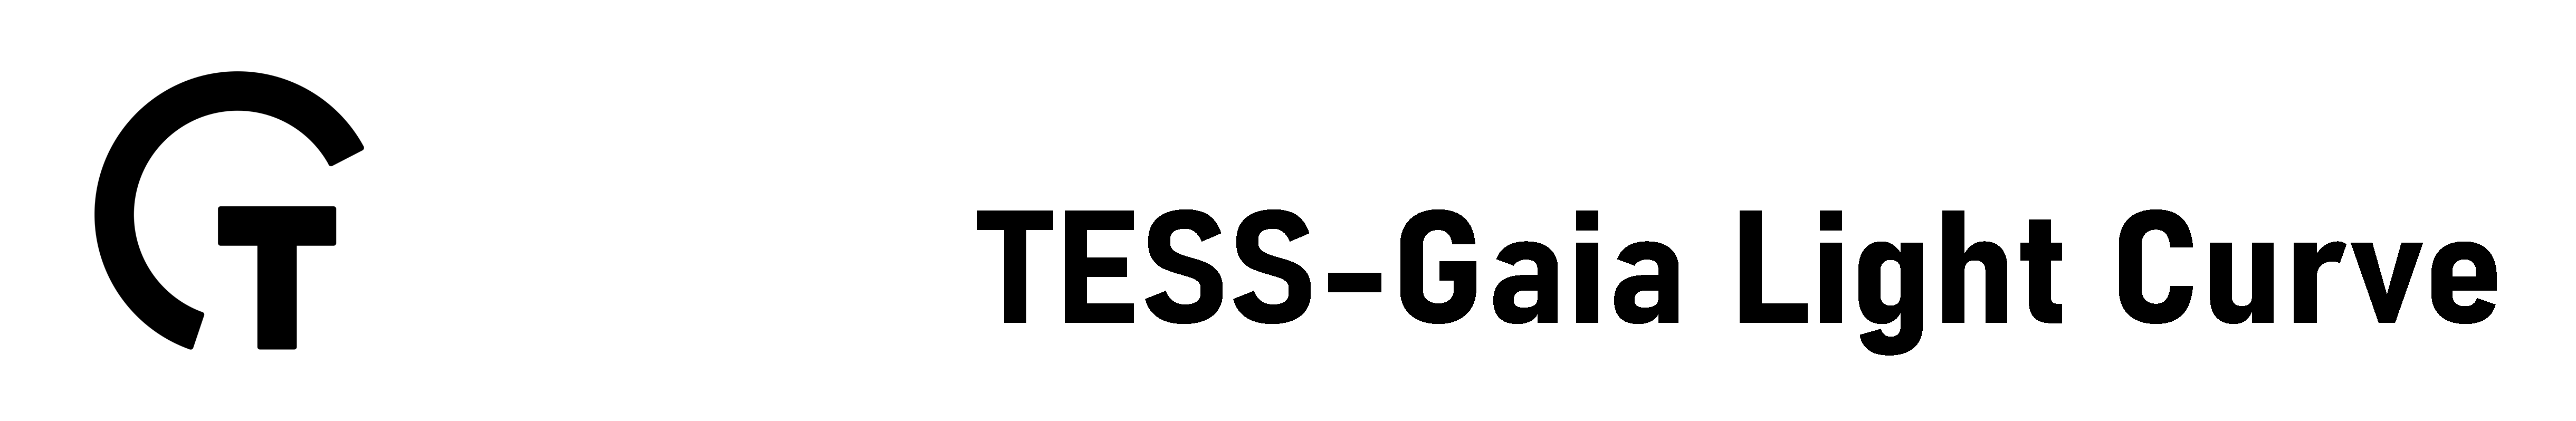

TESS-Gaia Light Curve (TGLC) is a dataset of TESS full-frame image light curves publicly available via the MAST portal. It is fitted with effective PSF and decontaminated with Gaia DR2 and achieved percent-level photometric precision down to 16th magnitude! It unlocks astrophysics to a vast number of dim stars below 12th magnitude. Here we introduce the basic data structure of our light curves and show simple analysis. 

# 1. Obtain Light curves

There are two ways to get the light curves: 
1. Download from the MAST portal 
2. Fit with the package `tglc`

to be continued ...

# 2. Data structure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [ ]:
hdul_s007 = fits.open('hlsp_tglc_tess_ffi_gaiaid-5707485527450614656-s0007-cam2-ccd3_tess_v1_llc.fits')
hdul_s007.info()

The naming of tglc light curves follows the structure:
hlsp_tglc_tess_ffi_gaiaid-{Gaia DR2 ID}-s{sector}-cam{camera No.}-ccd{CCD No.}_tess_v1_llc.fits

Each light curve fits file has two HDUs: the Primary HDU is a 5\*5 pixels cut around the star (could be empty if you downloaded from MAST); the Second HDU contains the light curves. 

# 3. Exoplanet example
Let's look at a faint star (14.5 TESS mag) hosting an exoplanet. Below are the raw light curves of TOI-519.

In [ ]:
q_07 = list(hdul_s007[1].data['TESS_flags'] == 0) and list(hdul_s007[1].data['TGLC_flags'] == 0)
# filter out bad datapoints from both TESS FFI flags and TGLC flags

time_07 = hdul_s007[1].data['time'][q_07]
psf_flux_07 = hdul_s007[1].data['psf_flux'][q_07] # raw psf flux
psf_flux_err_07 = hdul_s007[1].header['PSF_ERR'] # raw psf flux error
aper_flux_07 = hdul_s007[1].data['aperture_flux'][q_07] # raw aper flux
aper_flux_err_07 = hdul_s007[1].header['APER_ERR'] # raw aper flux error
plt.errorbar(time_07, psf_flux_07, psf_flux_err_07, marker = '', label = 'psf')
plt.errorbar(time_07, aper_flux_07, aper_flux_err_07, marker = '', label = 'aperture')
plt.title('TOI 519 b - TESS Sector 7')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

Note that the two light curves have different median flux levels. This is because the raw aperture flux only sums a 3\*3 pixel region around the star, which is not 100\% of the flux from the star. We account for this as well as the low frequency trend in the calibrated light curves. 

In [ ]:
cal_psf_flux_07 = hdul_s007[1].data['cal_psf_flux'][q_07] # raw psf flux
cal_psf_flux_err_07 = hdul_s007[1].header['CPSF_ERR'] # raw psf flux error
cal_aper_flux_07 = hdul_s007[1].data['cal_aper_flux'][q_07] # raw aper flux
cal_aper_flux_err_07 = hdul_s007[1].header['CAPE_ERR'] # raw aper flux error
plt.errorbar(time_07, cal_psf_flux_07, cal_psf_flux_err_07, marker = '', label = 'cal_psf')
plt.errorbar(time_07, cal_aper_flux_07, cal_aper_flux_err_07, marker = '', label = 'cal_aperture')
plt.title('TOI 519 b - TESS Sector 7')
plt.xlabel('TBJD')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

We can also crossmatch different sectors of the same star. TOI-519 has been observed by TESS for three times until today. We will bin all sectors to 30-min for fair comparison. 

In [ ]:
hdul_s008 = fits.open('hlsp_tglc_tess_ffi_gaiaid-5707485527450614656-s0008-cam2-ccd4_tess_v1_llc.fits')
q_08 = list(hdul_s008[1].data['TESS_flags'] == 0) and list(hdul_s008[1].data['TGLC_flags'] == 0)
time_08 = hdul_s008[1].data['time'][q_08]
cal_psf_flux_08 = hdul_s008[1].data['cal_psf_flux'][q_08] # raw psf flux
cal_psf_flux_err_08 = hdul_s008[1].header['CPSF_ERR'] # raw psf flux error

hdul_s034 = fits.open('hlsp_tglc_tess_ffi_gaiaid-5707485527450614656-s0034-cam2-ccd3_tess_v1_llc.fits')
q_34 = list(hdul_s034[1].data['TESS_flags'] == 0) and list(hdul_s034[1].data['TGLC_flags'] == 0)
time_34 = hdul_s034[1].data['time'][q_34]
time_34 = np.mean(time_34[:len(time_34) // 3 * 3].reshape(-1, 3), axis=1)
cal_psf_flux_34 = hdul_s034[1].data['cal_psf_flux'][q_34] # raw psf flux
cal_psf_flux_34 = np.mean(cal_psf_flux_34[:len(cal_psf_flux_34) // 3 * 3].reshape(-1, 3), axis=1)
cal_psf_flux_err_34 = hdul_s034[1].header['CPSF_ERR'] # raw psf flux error

In [ ]:
period = 1.2652328 # this work
plt.errorbar(time_07 % period, cal_psf_flux_07, cal_psf_flux_err_07, marker = '', lw=0.5, ls = '', label = 'S07')
plt.errorbar(time_08 % period, cal_psf_flux_08, cal_psf_flux_err_08, marker = '', lw=0.5, ls = '', label = 'S08')
plt.errorbar(time_34 % period, cal_psf_flux_34, cal_psf_flux_err_34, marker = '', lw=0.5, ls = '', label = 'S34')
plt.title('TOI 519 b - Calibrated PSF flux')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

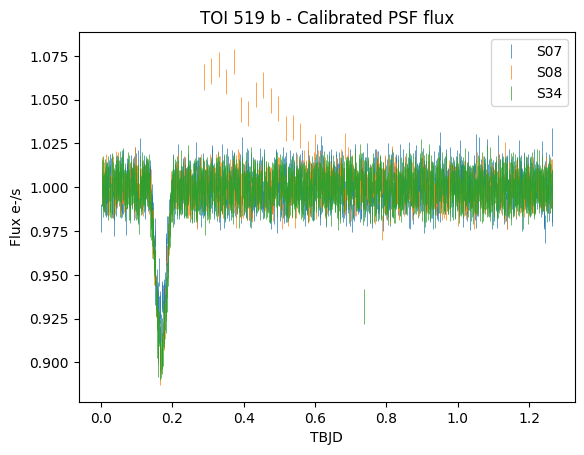

In [6]:
period = 1.2652328 # this work
plt.errorbar(time_07 % period, cal_psf_flux_07, cal_psf_flux_err_07, marker = '', lw=0.5, ls = '', label = 'S07')
plt.errorbar(time_08 % period, cal_psf_flux_08, cal_psf_flux_err_08, marker = '', lw=0.5, ls = '', label = 'S08')
plt.errorbar(time_34 % period, cal_psf_flux_34, cal_psf_flux_err_34, marker = '', lw=0.5, ls = '', label = 'S34')
plt.title('TOI 519 b - Calibrated PSF flux')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

The two flags take out the majority of bad datapoints, although several outliers remain. We can see a consistant transit depth among three sectors, an indication of the robustness of tglc.